# **Preparación de datos**
Autor: Christian Gabriel Lara López
 
Repo: [GitLab](https://git.uclv.edu.cu/clara/ampeptides/)


# **Cargar Dataset de Péptidos**

In [ ]:
! wget https://github.com/chrislara01/AMP/blob/master/TR_starPep_AMP.fasta
! wget https://github.com/chrislara01/AMP/blob/master/EX_starPep_AMP.fasta
! wget https://github.com/chrislara01/AMP/blob/master/TS_starPep_AMP.fasta

--2024-01-13 05:48:34--  https://github.com/chrislara01/AMP/blob/master/TR_starPep_AMP.fasta
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4260 (4.2K) [text/plain]
Saving to: ‘TR_starPep_AMP.fasta’

TR_starPep_AMP.fast 100%[===================>]   4.16K  --.-KB/s    in 0.005s  

2024-01-13 05:48:34 (859 KB/s) - ‘TR_starPep_AMP.fasta’ saved [4260/4260]



# **Eliminando secuencias redundantes utilizando CD-HIT**

In [95]:
! cd-hit -i EX_starPep_AMP.fasta -o EX_starPep_AMP_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i EX_starPep_AMP.fasta -o
         EX_starPep_AMP_cdhit.txt -c 0.99

Started: Sat Jan 13 06:41:47 2024
                            Output                              
----------------------------------------------------------------
total seq: 15318
longest and shortest : 100 and 11
Total letters: 507196
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 2M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 79M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90119636

comparing sequences from          0  to      15318
..........    10000  finished       9567  clusters
.....
    15318  finished      14296  clusters

Approximated maximum memory consumption: 82M
writing new database
writing clustering information
program completed !

Total CPU time 0.29


In [96]:
! cd-hit -i TR_starPep_AMP.fasta -o TR_starPep_AMP_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i TR_starPep_AMP.fasta -o
         TR_starPep_AMP_cdhit.txt -c 0.99

Started: Sat Jan 13 06:42:24 2024
                            Output                              
----------------------------------------------------------------
Discarding invalid sequence or sequence without identifier and description!

{"payload":{"allShortcutsEnabled":false,"fileTree":{"":{"items":[{"name":"Coleccion y procesamiento.ipynb","path":"Coleccion y procesamiento.ipynb","contentType":"file"},{"name":"Data Collection.ipynb","path":"Data Collection.ipynb","contentType":"file"},{"name":"TR_starPep_AMP.fasta","path":"TR_starPep_AMP.fasta","contentType":"file"}],"totalCount":3}},"fileTreeProcessingTime":1.759437,"foldersToFetch":[],"reducedMotionEnabled":null,"repo":{"id":742319498,"defaultBranch":"master","name":"AMP","ownerLogin":"chrislara01","currentUserCanPush":false,"isFork":false,"isEmpty":false,"createdAt":"2024-01-12T08:02:43.000Z","ow

In [97]:
! cd-hit -i TS_starPep_AMP.fasta -o TS_starPep_AMP_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i TS_starPep_AMP.fasta -o
         TS_starPep_AMP_cdhit.txt -c 0.99

Started: Sat Jan 13 06:42:28 2024
                            Output                              
----------------------------------------------------------------
total seq: 4452
longest and shortest : 100 and 11
Total letters: 157377
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90401149

comparing sequences from          0  to       4452
....
     4452  finished       4244  clusters

Approximated maximum memory consumption: 77M
writing new database
writing clustering information
program completed !

Total CPU time 0.15


# **Implementando funciones para el cálculo de features**

In [1]:
import pandas as pd
from Pfeature.pfeature import *

In [2]:
def split_np(file):
    """Divide archivos txt de tipo fasta en sets positivos y negativos"""
    with open (file, "r") as fasta:
        pos = ''
        neg = ''
        fastaread = fasta.read()
        array = fastaread.split('>')[1:]
        for line in array:
            if 'nonAMP' in line:
                neg += ('>' + line)
            else:
                pos += ('>' + line)
    pos = pos.removesuffix('\n')
    neg = neg.removesuffix('\n')
    with open(file.replace('.txt', '_pos.txt'), "w") as test:
        test.write(pos)
    with open(file.replace('.txt', '_neg.txt'), "w") as test:
        test.write(neg)
    return array

In [3]:
#Definiendo funciones para el calculo de features de los datasets

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

def pcp(input):
  a = input.rstrip('txt')
  output = a + 'pcp.csv'
  df_out = pcp_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

In [4]:
# Metodo para concatenar los features calculados de los datasets positivo y negativo

def feature_calc(po, ne, feature_name):
  # Calcular feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Crear columna de clase 
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combinar secuencias positivas y negativas
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combinar features y clase
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

In [5]:
# Encapsulamiento de la division y concatenacion en el calculo de features
# en archivos txt

def fastaFeatureCalc(input, feature):
    split_np(input)
    pos = input.replace('.txt', '_pos.txt')
    neg = input.replace('.txt', '_neg.txt')
    return feature_calc(pos, neg, feature)

def fastaFeatureListCalc(input, features):
    split_np(input)
    pos = input.replace('.txt', '_pos.txt')
    neg = input.replace('.txt', '_neg.txt')
    featureslist = []
    for feature in features:
        featureslist.append(feature_calc(pos, neg, feature))
    return featureslist

# **Preprocesamiento de los datos**

In [38]:
# Calculo inicial de features
feature_tr = fastaFeatureCalc("TR_starPep_AMP_cdhit.txt", pcp)
feature_ts = fastaFeatureCalc("TS_starPep_AMP_cdhit.txt", pcp)

In [39]:
# Asignando las features a X y la clase a Y
X_tr = feature_tr.drop('class', axis=1)
y_tr = feature_tr['class'].copy()
X_ts = feature_ts.drop('class', axis=1)
y_ts = feature_ts['class'].copy()

In [40]:
# Codificando la clase de Y
y_tr = y_tr.map({"positive": 1, "negative": 0})  
y_ts = y_ts.map({"positive": 1, "negative": 0})

In [41]:
# Seleccion de atributos utilizando Umbral de varianza
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X_tr)
X_tr_2 = X_tr.loc[:, fs.get_support()]
X_ts_2 = X_ts.loc[:, fs.get_support()]
print(X_tr_2)
print(X_ts_2)

      PCP_Z1  PCP_Z2  PCP_Z3  PCP_Z4
0      -0.99   -0.74   -0.28   -0.62
1      -1.44   -1.23   -0.26   -0.70
2      -1.56   -0.82   -0.58   -0.16
3      -1.05   -0.21   -0.49   -0.56
4      -0.95   -0.81   -0.75   -0.63
...      ...     ...     ...     ...
7656    0.15   -0.61   -0.06   -0.74
7657   -0.02   -1.00   -0.05   -0.24
7658    0.70   -0.36    0.15   -0.27
7659    0.42   -0.21   -0.15   -0.32
7660    0.22   -0.60   -0.48   -0.90

[14602 rows x 4 columns]
      PCP_Z1  PCP_Z2  PCP_Z3  PCP_Z4
0      -0.73   -0.35    0.01   -0.45
1      -0.59    0.06    0.08    0.14
2      -0.68   -0.18   -0.84    0.05
3       0.27   -0.22   -0.10   -0.30
4       0.87   -1.08   -0.45    0.38
...      ...     ...     ...     ...
2184   -1.12   -1.36   -0.59   -0.57
2185   -0.24   -0.10   -0.16   -0.15
2186    1.22   -0.51   -0.67   -0.61
2187    0.66   -0.88   -0.47   -0.64
2188   -0.05   -1.06   -0.52   -0.69

[4244 rows x 4 columns]


# **Exportando resultados del preprocesado**

In [42]:
from sklearn.utils import shuffle

X_tr_2['class'] = y_tr
X_ts_2['class'] = y_ts
X_tr_2 = shuffle(X_tr_2)
X_ts_2 = shuffle(X_ts_2)
X_tr_2.to_csv('train.csv' , index=False, header=True)
X_ts_2.to_csv('test.csv', index=False, header=True)

In [29]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [30]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

,Feature,Gini
0,PCP_Z1,0.20
1,PCP_Z2,0.23
2,PCP_Z3,0.24
3,PCP_Z4,0.33


Text(0.5, 0, 'Feature Importance')

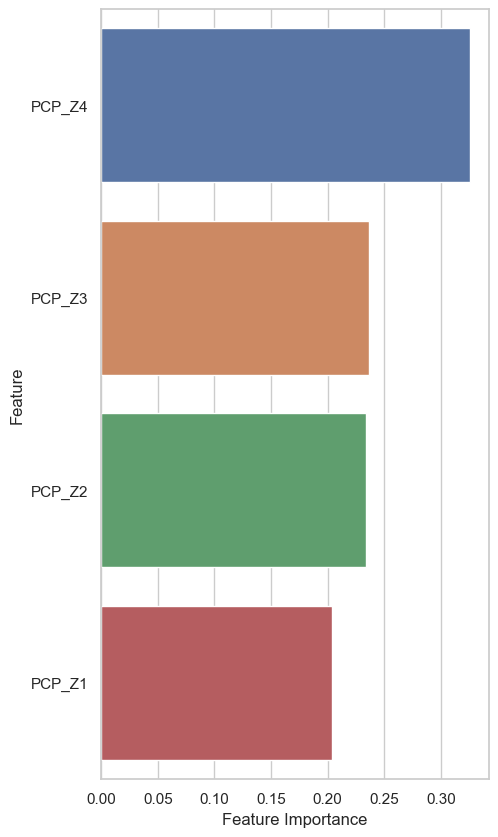

In [31]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False) # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")

<Axes: >

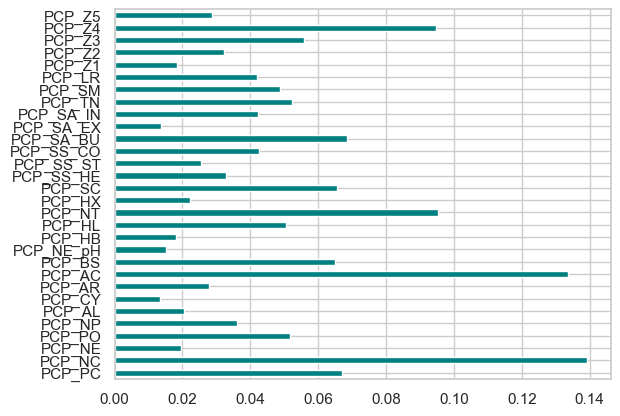

In [32]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, feature.columns[0:len(feature.columns)-1])
feat_importances.plot(kind='barh', color='teal')

In [33]:
import seaborn as sns
corr = feature.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot = True)

ValueError: could not convert string to float: 'positive'